In [237]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams["figure.figsize"] = (10,10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [238]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Градиентный спуск с фиксированным шагом

[None]

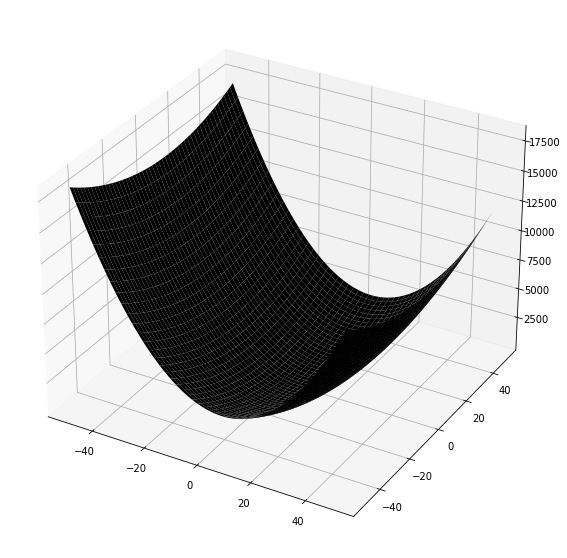

In [239]:
def f(x, y):
    return 5 * (x - 5) ** 2 + (y - 7) ** 2


def grad(x, y):
    return [10 * (x - 5), 2 * (y - 7)]


t = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y)).set(facecolor="black")

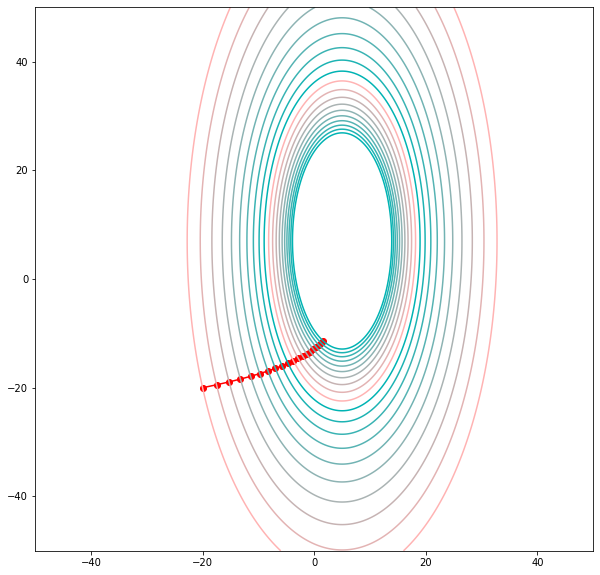

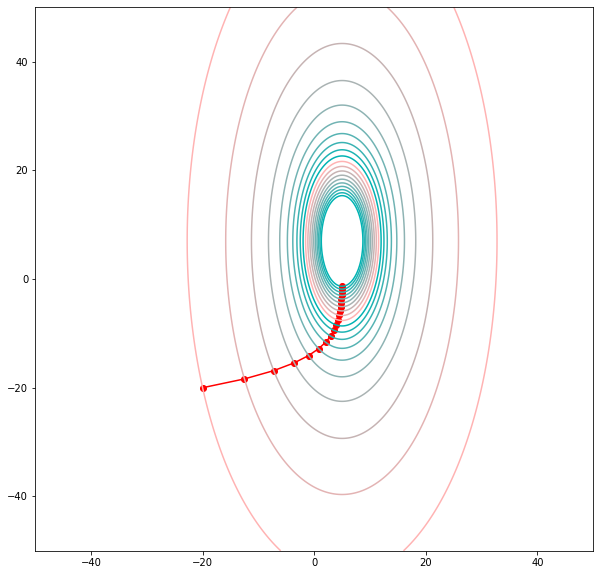

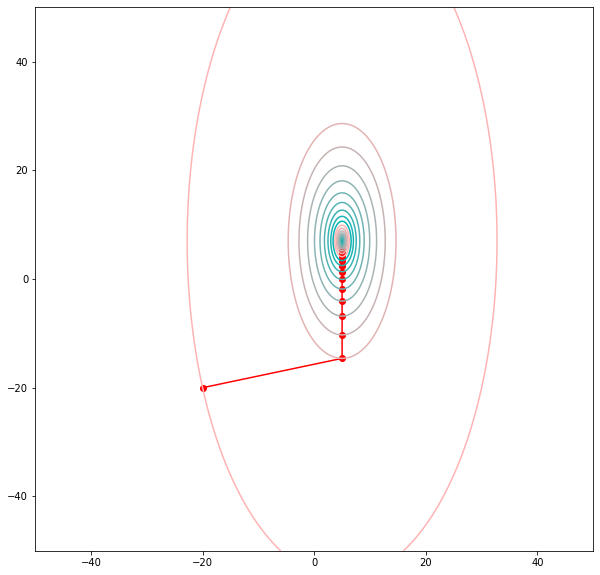

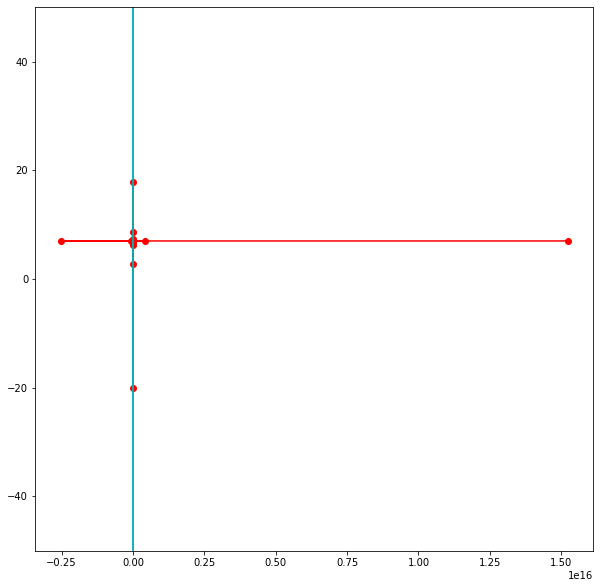

In [240]:
def f(x, y):
    return 5 * (x - 5) ** 2 + (y - 7) ** 2


def grad(x, y):
    return [10 * (x - 5), 2 * (y - 7)]

epoch = 20
t = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(t, t)
color_line = np.zeros((10, 3))
color_line[:, 1:] = 0.7
color_line[:, 0] = np.linspace(0, 1, 10)
for lr in [0.01, 0.03, 0.1, 0.7]:
    x = [-20, -20]
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr * np.array(grad(x[0], x[1]))
        points[i] = x
    ax = plt.figure().add_subplot()
    ax.plot(points[:, 0], points[:, 1], 'o-', color ='red')
    
    ax.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]),colors = color_line)
    

### Заметим разницу в повдении градиентного спуска, в зависимости от шага.                                     
Например: <br/>
При lr=0.01 - градиентный спуск сходится медленно; <br/>
При lr=0.03 - быстрее, чем при lr=0,01;  <br/>
При lr=0.7 - градиентный спуск расходится.<br/>
Таким образом, следует выбирать оптимальное значение константного шага

## Экспоненциальный шаг градиентного спуска
При экспоненциальном увеличении шага с начальным шагом 0.03 градиентный спуск сходится быстрее, чем при константом шаге 0.03.

[[-20.         -20.        ]
 [ -7.5        -17.3       ]
 [ -1.05965916 -14.79599548]
 [  2.15752462 -12.48161703]
 [  3.71260635 -10.34998859]
 [  4.43837249  -8.39378284]
 [  4.76463153  -6.60528044]
 [  4.90552514  -4.97643264]
 [  4.96380092  -3.49892642]
 [  4.98680995  -2.16425129]
 [  4.9954492   -0.96376695]
 [  4.99852067   0.11122915]
 [  4.99954952   1.06943522]
 [  4.99987236   1.91948051]
 [  4.99996662   2.66986348]
 [  4.99999202   3.32889361]
 [  4.99999828   3.9046377 ]
 [  4.99999967   4.40487128]
 [  4.99999994   4.83703578]
 [  4.99999999   5.20820192]]


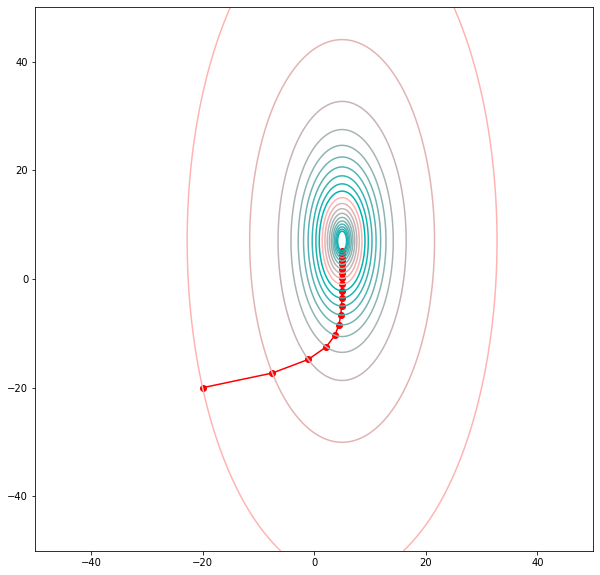

In [241]:
import optimization as opt

epoch = 20
x = [-20, -20]
lr = 0.05

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    lr = opt.exp_increase(lr, k=0.03)
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color='red')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]),colors = color_line)

## Поиск минимума одномерной функции при помощи дихотомии

20
[[-24.00363078]
 [-11.34590258]
 [ -5.01703848]
 [ -1.85260643]
 [ -0.2703904 ]
 [  0.52071761]
 [  0.91627162]
 [  1.11404862]
 [  1.01516012]
 [  0.96571587]
 [  0.99043799]
 [  1.00279905]
 [  0.99661852]
 [  0.99970879]
 [  1.00125392]
 [  1.00048136]
 [  1.00009507]
 [  0.99990193]
 [  0.9999985 ]
 [  1.00004679]
 [  1.00002264]]


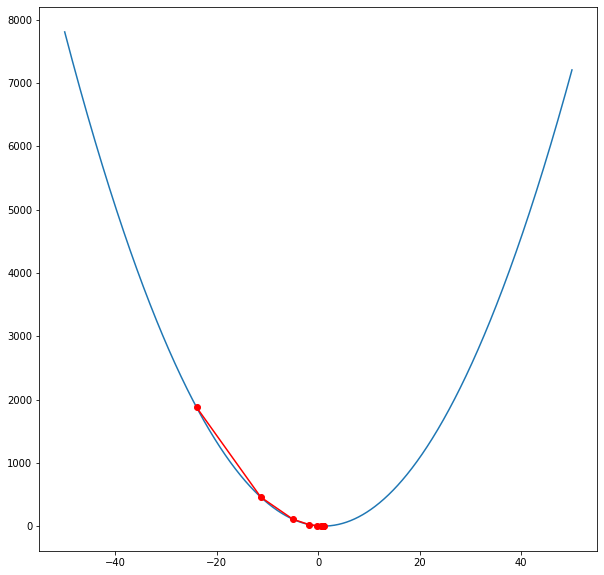

In [242]:
import optimization as opt

def f(x):
    return 3 * (x[0] - 1) ** 2 + 5

x = [-100]

bounds = opt.find_unimodal_interval(f, x)
points = opt.dichotomy(f, bounds, lambda iter, point: iter >= 20, log=True)

print(points)
t = np.linspace(-50, 50, 1000)
plt.plot(t, f([t]))
plt.plot(points, f([points]) , 'o-', color='red')

## Градиентный спуск на основе дихотомии
На каждом шаге алгоритма дихотомия производит 11 итераций. При этом соответствующая одномерная функция вычисляется 22 раза на каждой итерации. Число вычислений градиента константное.

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
[[0.5        0.5       ]
 [0.78250058 0.34921159]
 [1.6318715  1.49770743]
 [1.74008805 1.41762547]
 [1.87340918 1.58562941]
 [1.88594023 1.57577834]
 [1.89692959 1.56905797]
 [1.95513629 1.54328499]
 [1.98239701 1.6036521 ]
 [1.99006552 1.60030534]
 [2.03867768 1.58786869]
 [2.04038847 1.59447726]
 [2.05740132 1.63294926]
 [2.06282691 1.63062273]
 [2.09641917 1.62286842]
 [2.09754678 1.62771959]
 [2.10808348 1.65220983]
 [2.1117583  1.65066778]
 [2.13441912 1.64586995]
 [2.1351375  1.64924743]
 [2.14165407 1.66478507]]


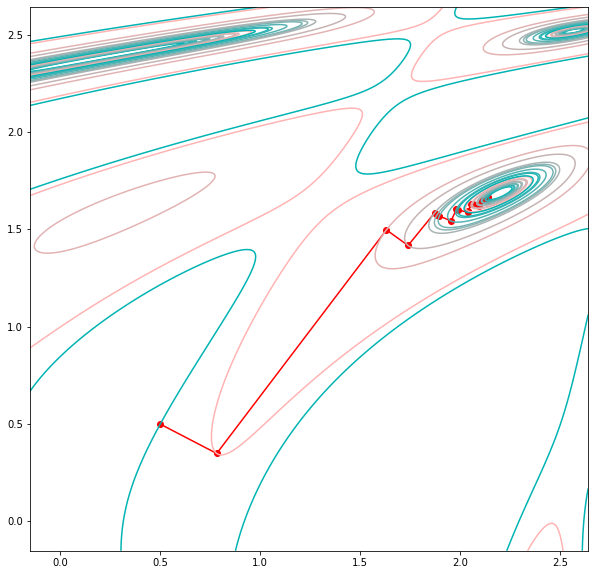

In [243]:
import optimization as opt

def f(x):
    return np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3)*np.cos(2*x[0]+1-np.exp(x[1]))


epoch = 20
x = [0.5, 0.5]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x),
                                   lambda g, bounds: opt.dichotomy(g, bounds, lambda iter, point: iter >= 10)),
    lambda i, p: i >= epoch
)

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color="red")
t = np.linspace(min(*points[:, 0], *points[:, 1]) - 0.5, max(*points[:, 0], *points[:, 1]) + 0.5, 1000)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted(list(set([f(p) for p in points]))),colors = color_line)

## Поиск минимума одномерной функции с помощью условий Вольфе

0
0
0
0
0
0
0
0
0
0
[[-5.        ]
 [ 3.36382295]
 [ 4.73229247]
 [ 4.95619831]
 [ 4.99283327]
 [ 4.9988274 ]
 [ 4.99980814]
 [ 4.99996861]
 [ 4.99999486]
 [ 4.99999916]
 [ 5.00000045]]


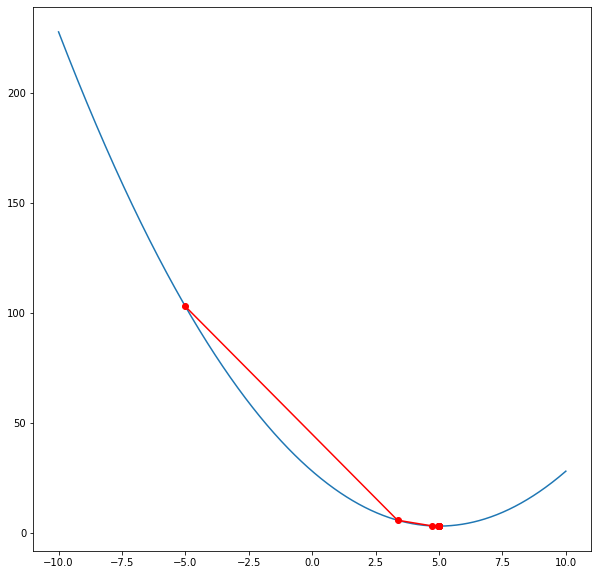

In [244]:
import optimization as opt

def f(x):
    return (x[0]-5)**2 + 3

epoch = 10
x = [-5]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x),
                                   lambda g, bounds: opt.dichotomy(g, bounds,
                                                                   lambda iter, point: opt.wolfe(point, f, x, -opt.grad(f, x)))),
    lambda i, p: i >= epoch
)

print(points)
t = [np.linspace(-10, 10,1000)]
plt.plot(t[0], f(t))
plt.plot(points, f([points]) , 'o-', color='red')

## Поиск минимума двумерной функции с помощью условий Вольфе
Если сравнивать этот метод с методом, где дихотомия останавливается после фиксированного числа итераций, то можно сделать следующие выводы. Дихотомия делает лишь одну итерацию на каждом шаге алгоритма. При этом точность вычислений не меняется, что видно по графику линий уровня. Однако для проверки условий Вольфе на каждой итерации необходимо один раз вычислять градиент исходной функции, а также саму исходную функцию.

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
[[0.5        0.5       ]
 [0.71845207 0.38339833]
 [0.83289902 0.37851067]
 [0.81644165 0.50117286]
 [0.91499788 0.51728044]
 [0.90168894 0.6801688 ]
 [0.98461193 0.67785695]
 [1.49353556 1.40335691]
 [1.62493531 1.33047802]
 [1.72686007 1.48273943]
 [1.8334925  1.44862898]
 [1.84716669 1.51915439]
 [2.02030285 1.53300802]
 [2.01444411 1.56497675]
 [2.01649934 1.58286567]
 [2.04353011 1.63219062]
 [2.0563012  1.62477415]
 [2.09928823 1.62158234]
 [2.10076488 1.63260522]
 [2.11890214 1.65948628]
 [2.12622777 1.65495566]]


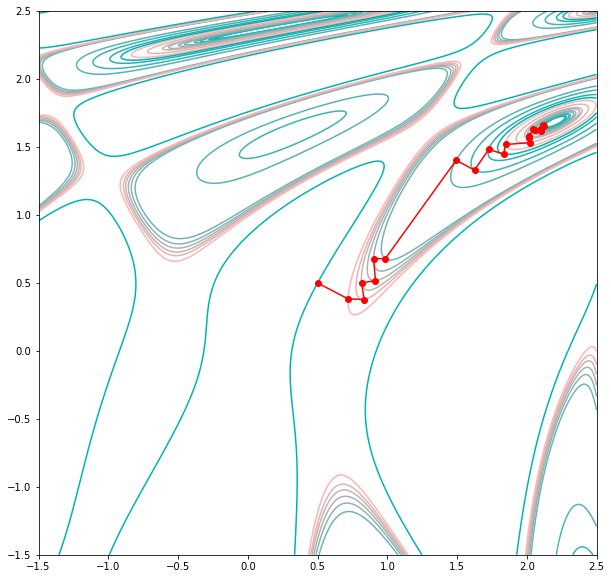

In [179]:
import optimization as opt

def f(x):
    return np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3)*np.cos(2*x[0]+1-np.exp(x[1]))

epoch = 20
x = [0.5, 0.5]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x),
                                   lambda g, bounds: opt.dichotomy(g, bounds,
                                                                   lambda iter, point: opt.wolfe(point, f, x, -opt.grad(f, x)))),
    lambda i, p: i >= epoch
)

print(points)
t = np.linspace(-1.5, 2.5, 1000)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points]),colors = color_line)
plt.plot(points[:, 0], points[:, 1], 'o-', color="red")

## Поиск минимума функции многих переменных с помощью условий Вольфе

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
6
[[-5.          5.          1.        ]
 [ 1.593472    1.0439168   4.76769829]
 [ 1.97639071 -0.67636722  5.6962865 ]
 [ 2.02750839 -2.39588644  6.22235507]
 [ 2.00159756 -2.17214934  6.05480171]
 [ 2.00009278 -2.07485832  6.01350645]
 [ 1.9998919  -1.97761056  5.99011164]
 [ 1.99999372 -1.99026406  5.99756291]
 [ 2.00000731 -2.00291193  6.00178424]
 [ 2.00000042 -2.00126624  6.00043975]
 [ 2.00000002 -2.00055062  6.00010838]
 [ 1.99999997 -1.99983532  5.99992065]
 [ 2.         -1.99992839  5.99998044]
 [ 2.         -1.99997372  5.99999695]
 [ 2.         -2.00000786  6.00000223]
 [ 2.         -2.00000288  6.00000035]
 [ 2.         -1.99999914  5.99999975]
 [ 2.         -1.99999968  5.99999996]
 [ 2.         -2.00000001  6.00000002]
 [ 2.         -1.99999999  5.99999998]
 [ 2.         -2.          6.        ]]


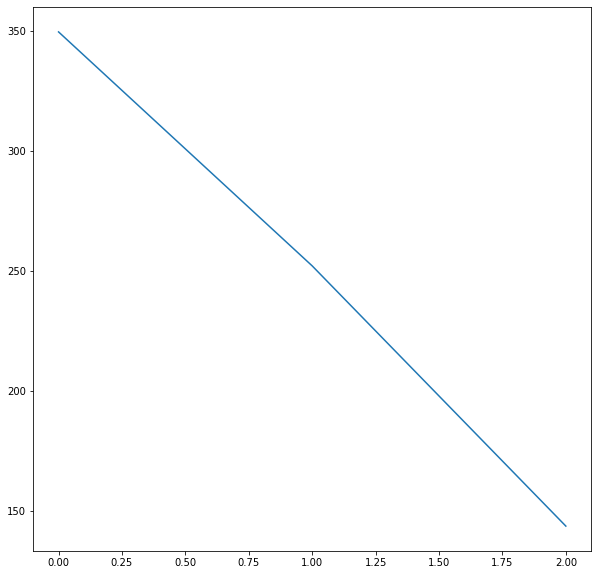

In [148]:
import optimization as opt

def f(x):
    return 5 * (x[0] - 2)**2 + 3 * (x[1] + 2) ** 2 + 4 * (x[2] - 6) ** 2 + 1

epoch = 20
x = [-5, 5, 1]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x),
                                   lambda g, bounds: opt.dichotomy(g, bounds,
                                                                   lambda iter, point: opt.wolfe(point, f, x, -opt.grad(f, x)))),
    lambda i, p: i >= epoch
)

print(points)
plt.plot(f(points))

## Генерация случайной квадратичной функции от 2 переменных

[[ 2.         -3.        ]
 [ 2.12       -1.88      ]
 [ 2.1952     -1.2128    ]
 [ 2.243712   -0.815488  ]
 [ 2.27633152 -0.57904128]
 [ 2.29949317 -0.43847803]
 [ 2.31703229 -0.35506654]
 [ 2.33123495 -0.30572122]
 [ 2.3434638  -0.27668213]
 [ 2.35453109 -0.25974783]
 [ 2.364921   -0.25002994]]


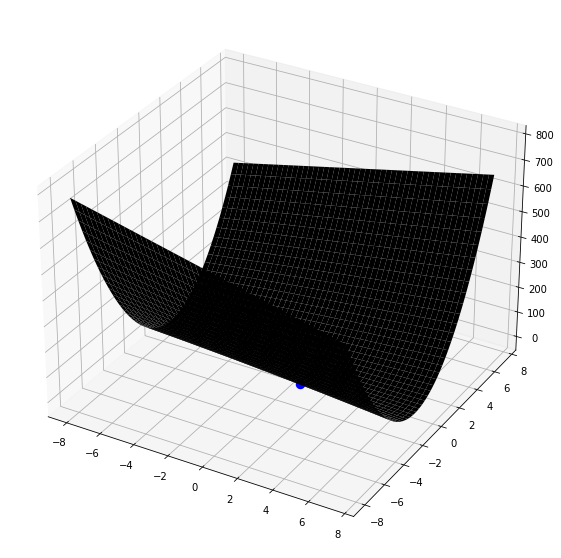

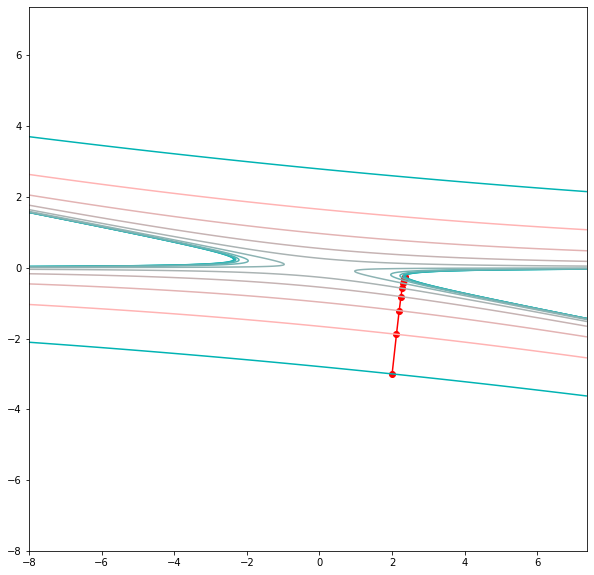

In [251]:
import optimization as opt
f = opt.gen_quadratic_function(2, 10)

epoch = 10
x = [2, -3]

points = opt.gradient_descent(
    x,
    lambda x: x - 0.02 * opt.grad(f, x),
    lambda iteration, p: iteration >= epoch
)


print(points)
t = np.linspace(min(*points[:, 0], *points[:, 1]) - 5, max(*points[:, 0], *points[:, 1]) + 5, 1000)
X = np.meshgrid(t, t)
ax1 = plt.figure().add_subplot(projection='3d')
ax1.plot_surface(X[0], X[1], f(X)).set(facecolor="black")
ax1.scatter(points[0][0], points[0][1], f(points[0]), color='blue', linewidths=5)
ax2 = plt.figure().add_subplot()
ax2.plot(points[:, 0], points[:, 1], 'o-', color="red")
ax2.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points]),colors = color_line)

Изменение поведения от выбора начальной точки: <br/>                                               
Выбирая начальную точку как можно ближе к экстремуму функции, мы увеличиваем точность нахождения самого экстремума

[None]

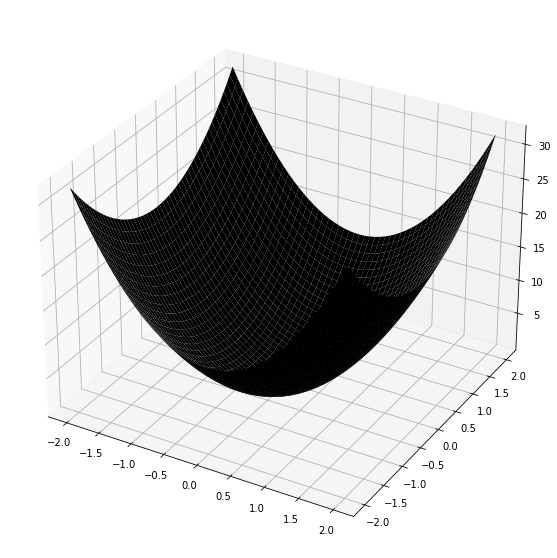

In [227]:
def f(x, y):
    return 5 * x ** 2 + 3 * y ** 2


def grad(x, y):
    return [10 * x, 6 * y]

t = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y)).set(facecolor="black")

[[1.         1.        ]
 [0.9        0.94      ]
 [0.81       0.8836    ]
 [0.729      0.830584  ]
 [0.6561     0.78074896]
 [0.59049    0.73390402]
 [0.531441   0.68986978]
 [0.4782969  0.64847759]
 [0.43046721 0.60956894]
 [0.38742049 0.5729948 ]
 [0.34867844 0.53861511]
 [0.3138106  0.50629821]
 [0.28242954 0.47592031]
 [0.25418658 0.4473651 ]
 [0.22876792 0.42052319]
 [0.20589113 0.3952918 ]
 [0.18530202 0.37157429]
 [0.16677182 0.34927983]
 [0.15009464 0.32832304]
 [0.13508517 0.30862366]]


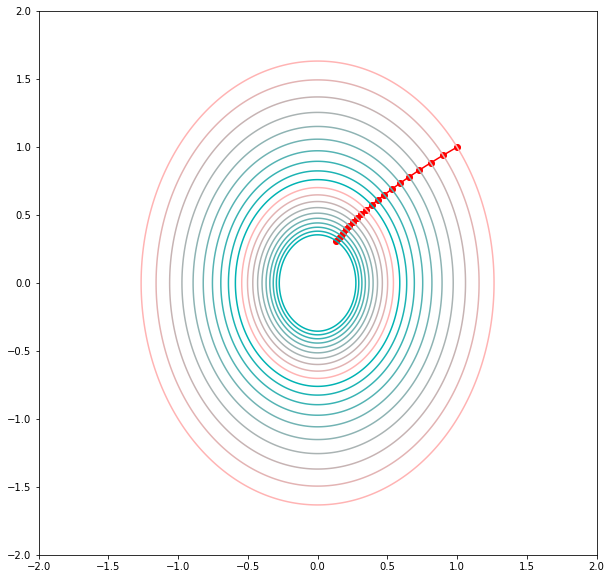

In [228]:
lr = 0.01
epoch = 20
x = [1, 1]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color='red')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]),colors = color_line)

[None]

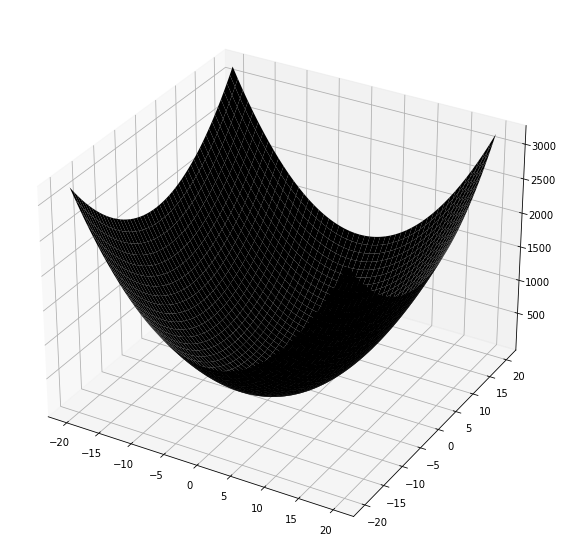

In [229]:
def f(x, y):
    return 5 * x ** 2 + 3 * y ** 2


def grad(x, y):
    return [10 * x, 6 * y]


t = np.linspace(-20, 20, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y)).set(facecolor="black")

[[-20.         -20.        ]
 [-18.         -18.8       ]
 [-16.2        -17.672     ]
 [-14.58       -16.61168   ]
 [-13.122      -15.6149792 ]
 [-11.8098     -14.67808045]
 [-10.62882    -13.79739562]
 [ -9.565938   -12.96955188]
 [ -8.6093442  -12.19137877]
 [ -7.74840978 -11.45989604]
 [ -6.9735688  -10.77230228]
 [ -6.27621192 -10.12596414]
 [ -5.64859073  -9.5184063 ]
 [ -5.08373166  -8.94730192]
 [ -4.57535849  -8.4104638 ]
 [ -4.11782264  -7.90583598]
 [ -3.70604038  -7.43148582]
 [ -3.33543634  -6.98559667]
 [ -3.00189271  -6.56646087]
 [ -2.70170344  -6.17247322]]


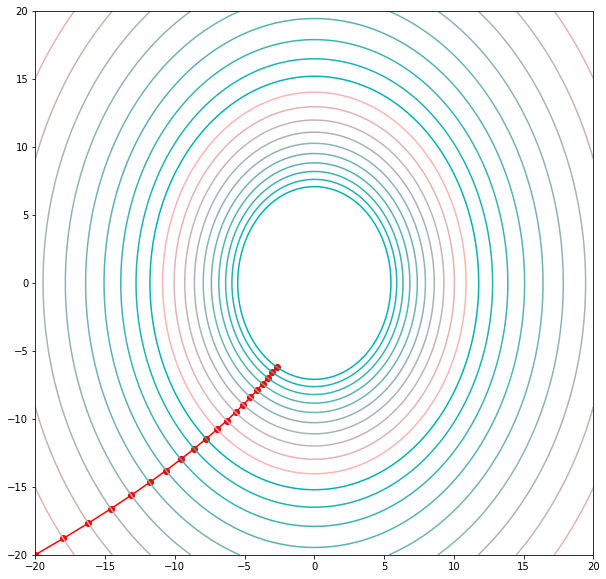

In [230]:
lr = 0.01
epoch = 20
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color ='red')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]), colors = color_line)

### Зафиксируем начальную точку и попробуем использовать разный константный шаг.

[None]

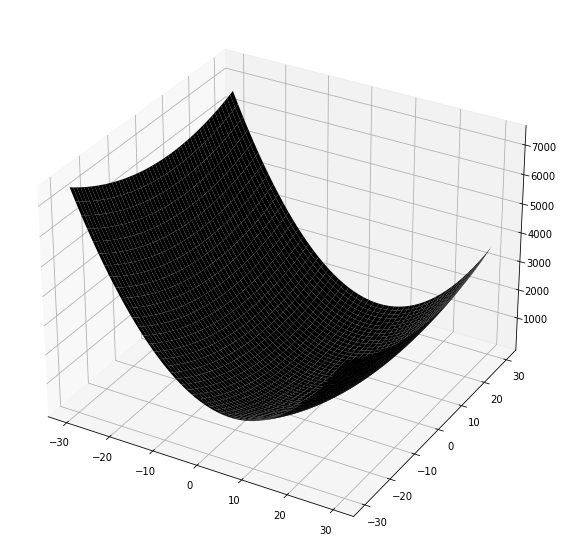

In [231]:
def f(x, y):
    return 5 * (x - 5) ** 2 + (y - 7) ** 2


def grad(x, y):
    return [10 * (x - 5), 2 * (y - 7)]


t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y)).set(facecolor="black")

[[-20.         -20.        ]
 [ 30.          -9.2       ]
 [-20.          -2.72      ]
 [ 30.           1.168     ]
 [-20.           3.5008    ]
 [ 30.           4.90048   ]
 [-20.           5.740288  ]
 [ 30.           6.2441728 ]
 [-20.           6.54650368]
 [ 30.           6.72790221]
 [-20.           6.83674132]
 [ 30.           6.90204479]
 [-20.           6.94122688]
 [ 30.           6.96473613]
 [-20.           6.97884168]
 [ 30.           6.98730501]
 [-20.           6.992383  ]
 [ 30.           6.9954298 ]
 [-20.           6.99725788]
 [ 30.           6.99835473]]


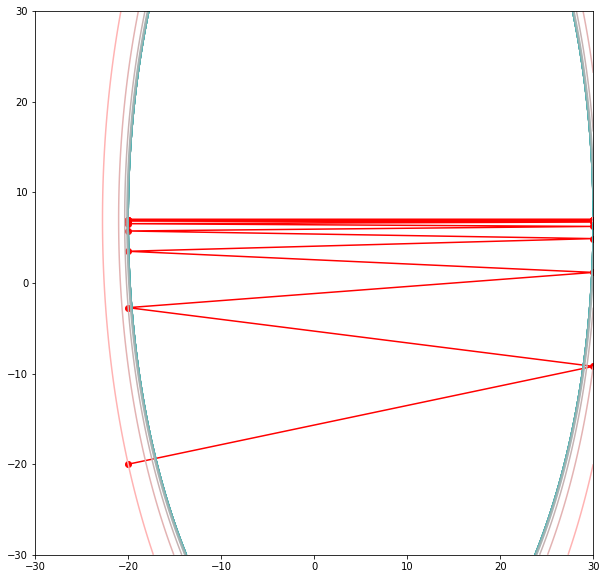

In [232]:
lr = 0.2
epoch = 20
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color='red')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]), colors = color_line)

[[-20.         -20.        ]
 [  5.         -14.6       ]
 [  5.         -10.32298472]
 [  5.          -6.92699139]
 [  5.          -4.22391407]
 [  5.          -2.06715045]
 [  5.          -0.34216239]
 [  5.           1.04075524]
 [  5.           2.15202784]
 [  5.           3.04707631]
 [  5.           3.76961635]
 [  5.           4.35421075]
 [  5.           4.82824842]
 [  5.           5.21348259]
 [  5.           5.52722914]
 [  5.           5.78330224]
 [  5.           5.99274653]
 [  5.           6.16441149]
 [  5.           6.30540282]
 [  5.           6.42143808]]


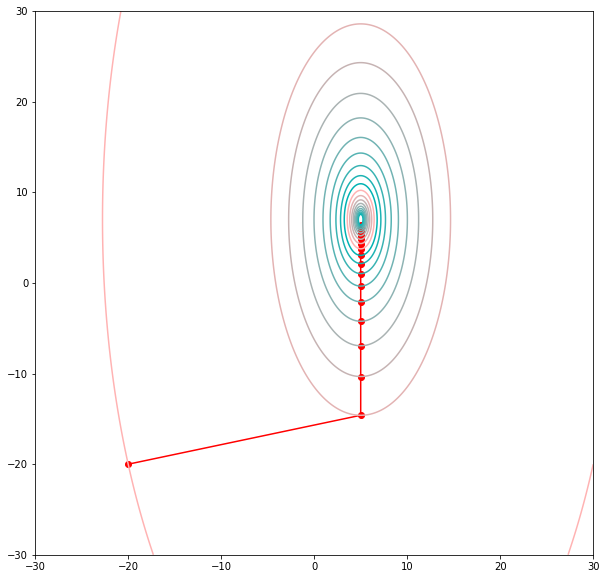

In [233]:
import optimization as opt

epoch = 20
x = [-20, -20]
lr = 0.1

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    lr = opt.exp_decay(lr)
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color ='red')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]),colors = color_line)

### Cравним экспоненциальный шаг и константый.  
<br/> Экспоненциальный в данном случае имеет точность меньше, чем константый.

[None]

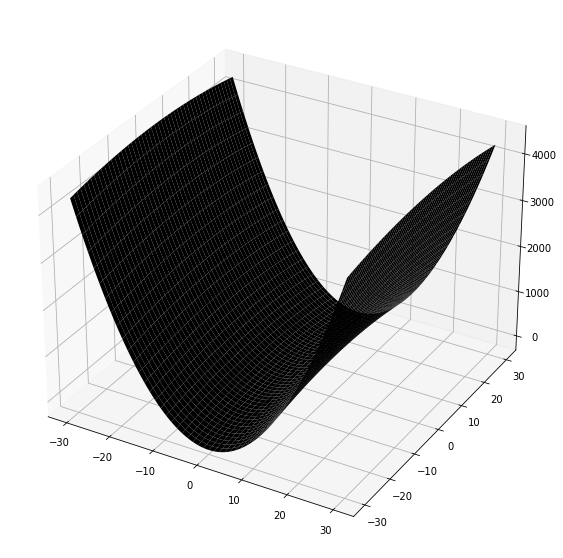

In [234]:
def f(x, y):
    return 5 * x ** 2 - 0.25 * y ** 2


def grad(x, y):
    return [10 * x, - 0.5 * y]


t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y)).set(facecolor="black")

[[-1.00000000e+01 -1.00000000e+01]
 [-2.00000000e+00 -1.04000000e+01]
 [-4.00000000e-01 -1.08160000e+01]
 [-8.00000000e-02 -1.12486400e+01]
 [-1.60000000e-02 -1.16985856e+01]
 [-3.20000000e-03 -1.21665290e+01]
 [-6.40000000e-04 -1.26531902e+01]
 [-1.28000000e-04 -1.31593178e+01]
 [-2.56000000e-05 -1.36856905e+01]
 [-5.12000000e-06 -1.42331181e+01]
 [-1.02400000e-06 -1.48024428e+01]
 [-2.04800000e-07 -1.53945406e+01]
 [-4.09600000e-08 -1.60103222e+01]
 [-8.19200000e-09 -1.66507351e+01]
 [-1.63840000e-09 -1.73167645e+01]
 [-3.27680000e-10 -1.80094351e+01]
 [-6.55360000e-11 -1.87298125e+01]
 [-1.31072000e-11 -1.94790050e+01]
 [-2.62144000e-12 -2.02581652e+01]
 [-5.24288000e-13 -2.10684918e+01]]


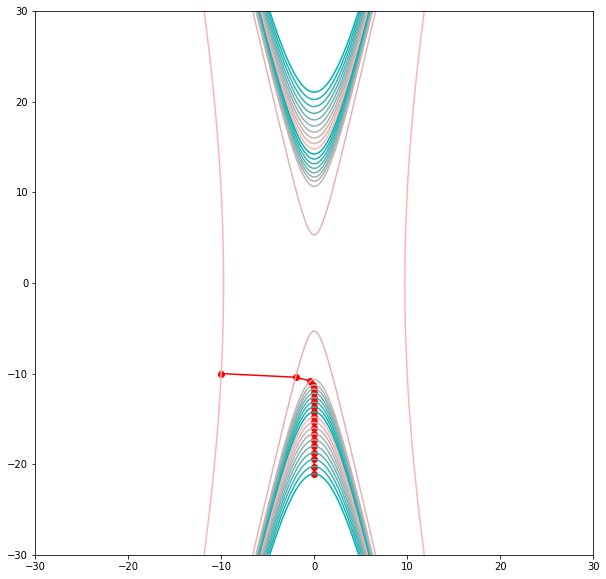

In [235]:
lr = 0.08
epoch = 20
x = [-10, -10]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color='red')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]),colors = color_line)

[[-10.         -10.        ]
 [  0.         -10.5       ]
 [  0.         -11.01977616]
 [  0.         -11.55985466]
 [  0.         -12.12076513]
 [  0.         -12.70304028]
 [  0.         -13.30721557]
 [  0.         -13.93382875]
 [  0.         -14.58341954]
 [  0.         -15.25652919]
 [  0.         -15.95370008]
 [  0.         -16.67547532]
 [  0.         -17.42239832]
 [  0.         -18.19501238]
 [  0.         -18.99386024]
 [  0.         -19.81948368]
 [  0.         -20.67242307]
 [  0.         -21.55321691]
 [  0.         -22.46240145]
 [  0.         -23.40051019]]


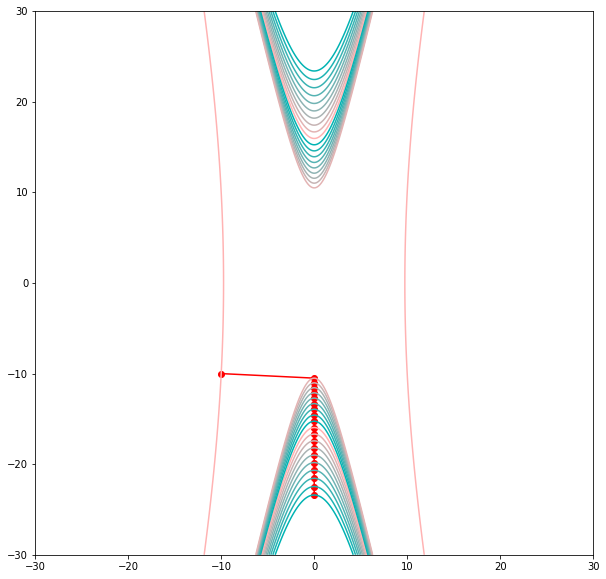

In [236]:
import optimization as opt

epoch = 20
x = [-10, -10]
lr = 0.1

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    lr = opt.exp_decay(lr)
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color='red')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]),colors = color_line)